In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
# Changed to read Excel file using read_excel
data = pd.read_excel('/content/drive/MyDrive/advertising_sales_data.xlsx')

# Basic data exploration
print(data.head())
print(data.info())
print(data.describe())

# Drop non-numeric columns if they exist to handle correlation analysis errors
numeric_data = data.select_dtypes(include=[np.number])

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
numeric_data = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)


  Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  198.000000  200.000000  200.000000
mean   147.042500   23.260606   30.554000   15.130500
std     85.854236   14.921914   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.925000  

In [10]:
# 1. Calculate the average amount spent on TV advertising
average_tv_spent = numeric_data['TV'].mean()
print(f'1. Average amount spent on TV advertising: {average_tv_spent}')

1. Average amount spent on TV advertising: 147.0425


2. Correlation Matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054848   0.056648  0.901208
Radio      0.054848  1.000000   0.354987  0.349728
Newspaper  0.056648  0.354987   1.000000  0.157960
Sales      0.901208  0.349728   0.157960  1.000000


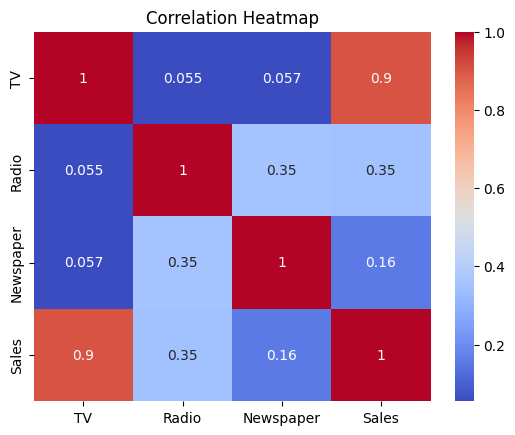

In [11]:
# 2. Correlation analysis
correlation_matrix = numeric_data.corr()
print('2. Correlation Matrix:')
print(correlation_matrix)

# Visualizing correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# 3. Which advertising medium has the highest impact on sales?
highest_correlation = correlation_matrix['Sales'].drop('Sales').idxmax()
print(f'3. The advertising medium with the highest impact on sales is: {highest_correlation}')

3. The advertising medium with the highest impact on sales is: TV


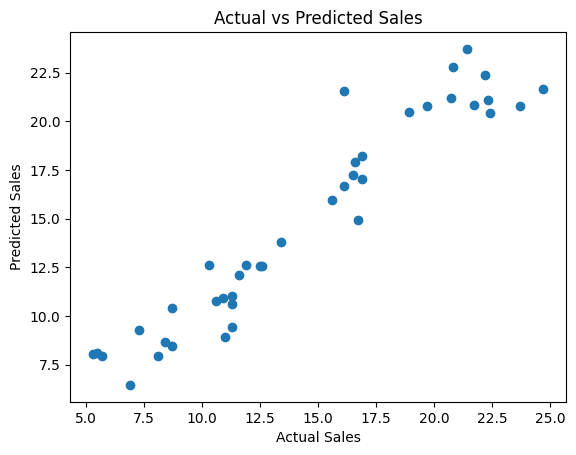

In [16]:
# 4. Linear regression model with all variables (TV, Radio, Newspaper) to predict Sales
X = numeric_data[['TV', 'Radio', 'Newspaper']]
y = numeric_data['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plotting the actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [17]:
# 5. Model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'4. Mean Squared Error: {mse}')
print(f'4. R^2 Score: {r2}')

4. Mean Squared Error: 2.9074318865000555
4. R^2 Score: 0.9059117026092904


In [18]:
# 6. Predict sales for a new set of advertising expenditures
new_data = np.array([[200, 40, 50]])
sales_prediction = model.predict(new_data)
print(f'5. Predicted sales for $200 on TV, $40 on Radio, and $50 on Newspaper: {sales_prediction[0]}')

5. Predicted sales for $200 on TV, $40 on Radio, and $50 on Newspaper: 19.871049209206635


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
# 7. Normalizing the dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the normalized dataset
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train the model on normalized data
model.fit(X_train_norm, y_train_norm)
y_pred_norm = model.predict(X_test_norm)

# Model performance after normalization
mse_norm = mean_squared_error(y_test_norm, y_pred_norm)
r2_norm = r2_score(y_test_norm, y_pred_norm)
print(f'6. Mean Squared Error after normalization: {mse_norm}')
print(f'6. R^2 Score after normalization: {r2_norm}')

6. Mean Squared Error after normalization: 2.907431886500056
6. R^2 Score after normalization: 0.9059117026092904


In [20]:
# 8. Impact on sales prediction when using only Radio and Newspaper as predictors
X_radio_newspaper = numeric_data[['Radio', 'Newspaper']]
X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X_radio_newspaper, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train_rn, y_train_rn)
y_pred_rn = model.predict(X_test_rn)

# Model performance with only Radio and Newspaper
mse_rn = mean_squared_error(y_test_rn, y_pred_rn)
r2_rn = r2_score(y_test_rn, y_pred_rn)
print(f'7. Mean Squared Error (Radio & Newspaper only): {mse_rn}')
print(f'7. R^2 Score (Radio & Newspaper only): {r2_rn}')

7. Mean Squared Error (Radio & Newspaper only): 27.50240015808231
7. R^2 Score (Radio & Newspaper only): 0.10998637077378115
